I will focus on the **Loading Datasets**, specifically using the widely recognized MNIST dataset to get started with deep learning. 
The steps are:
1. **Import Libraries**: Utilizing PyTorch's `torchvision` library to efficiently load and handle the data.
2. **Data Preprocessing**: Applying transformations such as converting images to tensors and normalizing pixel values.
3. **Splitting the Data**: Separating the dataset into **training** and **testing** sets to ensure proper evaluation.

In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

Data Preprocessing

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),  #  Convert the image to a tensor
    transforms.Normalize((0.5,), (0.5,)) # Normalize the image with mean 0 and std deviation 1
])

Load Training Dataset

In [4]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 8.79MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 185kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.87MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.37MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Load Testing Dataset:

In [5]:
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=False)

Visualising the Dataset:

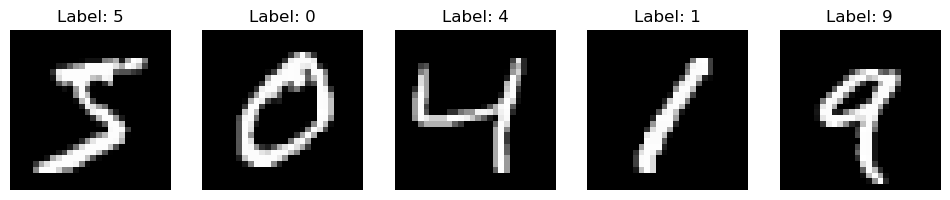

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    image, label = train_dataset[i]
    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')
plt.show()

## **Experimenting with Different Machine Learning Models**

The Perceptron Model:

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(28 * 28, 10)  # Input size: 28x28, Output size: 10 classes

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        return self.fc(x)

model = Perceptron()
print(model)

Perceptron(
  (fc): Linear(in_features=784, out_features=10, bias=True)
)


ReLU Activation Function

/var/folders/q3/xtd49n1s5vx5jq1_3k6fk7lh0000gn/T/ipykernel_88300/4293903598.py:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return np.maximum(0, x)


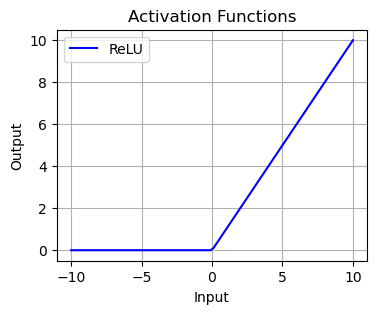

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Input range for visualization
x = torch.linspace(-10, 10, 100)

# Compute values for different activation functions
def relu(x):
    return np.maximum(0, x)

relu_y = relu(x)

# Visualization
plt.figure(figsize=(4, 3))
# ReLU
plt.plot(x.numpy(), relu_y.numpy(), label='ReLU', color='blue')

# Graph styling
plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()

Leaky ReLU

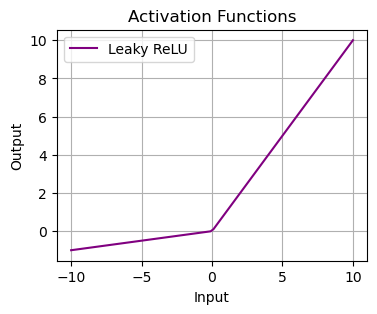

In [12]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Input range for visualization
x = torch.linspace(-10, 10, 100)

# Compute values for different activation functions
leaky_relu_y = F.leaky_relu(x, negative_slope=0.1)

# Visualization
plt.figure(figsize=(4, 3))

# Leaky ReLU
plt.plot(x.numpy(), leaky_relu_y.numpy(), label='Leaky ReLU', color='purple')

# Graph styling
plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()

Sigmoid:

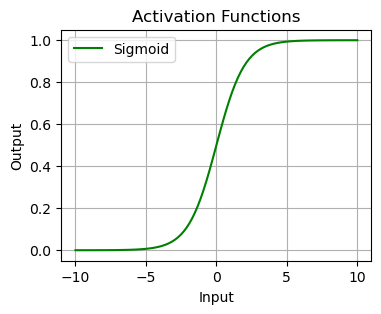

In [10]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Input range for visualization
x = torch.linspace(-10, 10, 100)

# Compute values for different activation functions
sigmoid_y = torch.sigmoid(x)

# Visualization
plt.figure(figsize=(4, 3))
# Sigmoid
plt.plot(x.numpy(), sigmoid_y.numpy(), label='Sigmoid', color='green')

# Graph styling
plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()

Tanh Function

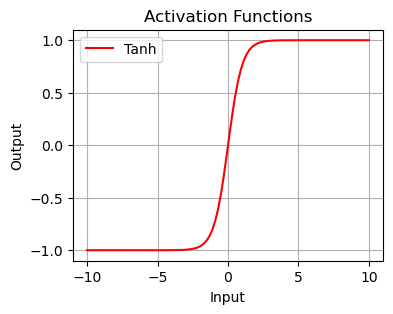

In [11]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Input range for visualization
x = torch.linspace(-10, 10, 100)

# Compute values for different activation functions
tanh_y = torch.tanh(x)

# Visualization
plt.figure(figsize=(4, 3))

# Tanh
plt.plot(x.numpy(), tanh_y.numpy(), label='Tanh', color='red')

# Graph styling
plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()

MLP Model

In [13]:
# Define the Multilayer Perceptron (MLP) model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Hidden layer 1
        self.fc2 = nn.Linear(128, 64)       # Hidden layer 2
        self.fc3 = nn.Linear(64, 10)        # Output layer

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

Fully Connected

In [14]:
# Define a Basic Fully Connected Neural Network
class FullyConnectedNN(nn.Module):
    def __init__(self):
        super(FullyConnectedNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.fc(x)

Simple CNN

In [15]:
# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 256 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## **Introduction of Loss Functions in Machine Learning**
Loss functions are used to measure the error between the predicted outputs of a model and the actual target values. They play a critical role in training neural networks, guiding the optimization process to improve performance. I will experiment with three common loss functions with visualisations.

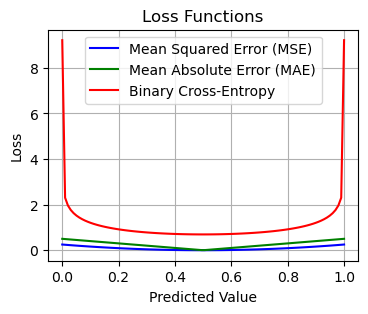

In [16]:
import torch
import matplotlib.pyplot as plt

# Input values (predictions and targets)
y_pred = torch.linspace(0, 1, 100)  # Predicted values
y_true = 0.5  # Fixed target value

# Compute values for different loss functions
mse_loss = (y_pred - y_true) ** 2  # Mean Squared Error
mae_loss = torch.abs(y_pred - y_true)  # Mean Absolute Error
binary_cross_entropy_loss = -(y_true * torch.log(y_pred + 1e-8) + (1 - y_true) * torch.log(1 - y_pred + 1e-8))  # Binary Cross-Entropy

# Visualization
plt.figure(figsize=(4, 3))
# MSE
plt.plot(y_pred.numpy(), mse_loss.numpy(), label='Mean Squared Error (MSE)', color='blue')
# MAE
plt.plot(y_pred.numpy(), mae_loss.numpy(), label='Mean Absolute Error (MAE)', color='green')
# Binary Cross-Entropy
plt.plot(y_pred.numpy(), binary_cross_entropy_loss.numpy(), label='Binary Cross-Entropy', color='red')

# Graph styling
plt.title('Loss Functions')
plt.xlabel('Predicted Value')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

Categorical Cross Entropy (CCE) Function

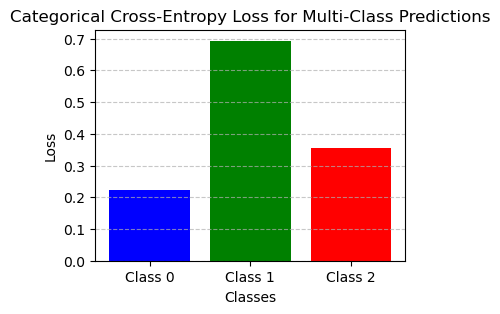

In [17]:
import torch
import matplotlib.pyplot as plt

# Predicted probabilities (softmax outputs) for a 3-class classification
y_pred = torch.tensor([[0.8, 0.1, 0.1],
                       [0.2, 0.5, 0.3],
                       [0.1, 0.2, 0.7]])

# True labels (one-hot encoded)
y_true = torch.tensor([[1, 0, 0],  # Class 0
                       [0, 1, 0],  # Class 1
                       [0, 0, 1]])  # Class 2

# Compute the categorical cross-entropy loss manually
categorical_cross_entropy_loss = -torch.sum(y_true * torch.log(y_pred + 1e-8), dim=1)

# Visualization
classes = ['Class 0', 'Class 1', 'Class 2']
plt.figure(figsize=(4, 3))
plt.bar(classes, categorical_cross_entropy_loss.numpy(), color=['blue', 'green', 'red'])

# Graph styling
plt.title('Categorical Cross-Entropy Loss for Multi-Class Predictions')
plt.ylabel('Loss')
plt.xlabel('Classes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Conclusion**
- **MSE** is suitable for regression tasks but sensitive to outliers.
- **MAE** is robust to outliers but converges more slowly.
- **BCE** is ideal for binary classification tasks, as it measures the error in predicted probabilities.
- **Categorical Cross-Entropy** extends the idea to handle multi-class classification.

## **Basic NN For MNIST**
1.Import Libraries
    
2.Load the MNIST Dataset
    
3.Define the Neural Network
    
4.Define Loss and Optimizer
    
5.Train the Model
    
6.Evaluate the Model
    
7.Visualize the Training Loss

Epoch [1/5], Loss: 0.1513
Epoch [2/5], Loss: 0.0405
Epoch [3/5], Loss: 0.0264
Epoch [4/5], Loss: 0.0171
Epoch [5/5], Loss: 0.0125
Accuracy of the model on the test images: 98.57%


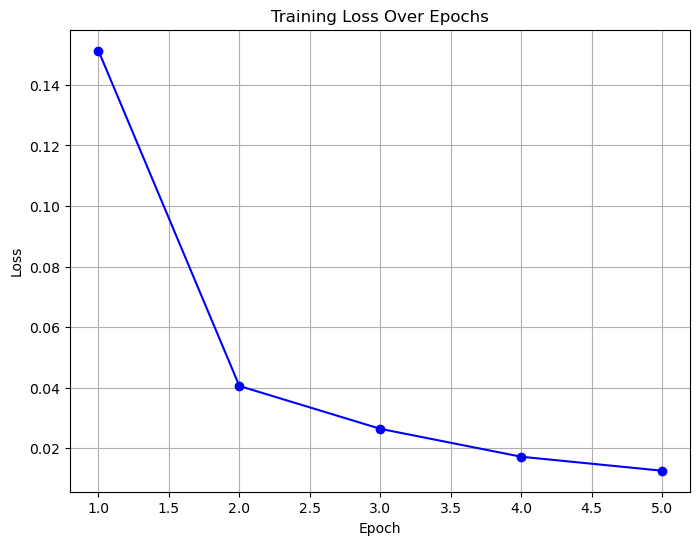

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 64
learning_rate = 0.001
epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=False)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=False)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Instantiate model, define loss and optimizer
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Loss history
loss_history = []

def train():
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            # Forward pass
            outputs = model(images.to(device))
            loss = criterion(outputs, labels.to(device))

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        average_loss = running_loss / len(train_loader)
        loss_history.append(average_loss)  # Record the average loss for this epoch
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {average_loss:.4f}')

def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()
    print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

if __name__ == '__main__':
    train()
    test()

    # Plot the loss history
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, epochs + 1), loss_history, marker='o', color='b')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

Now Ill visualise the predictions

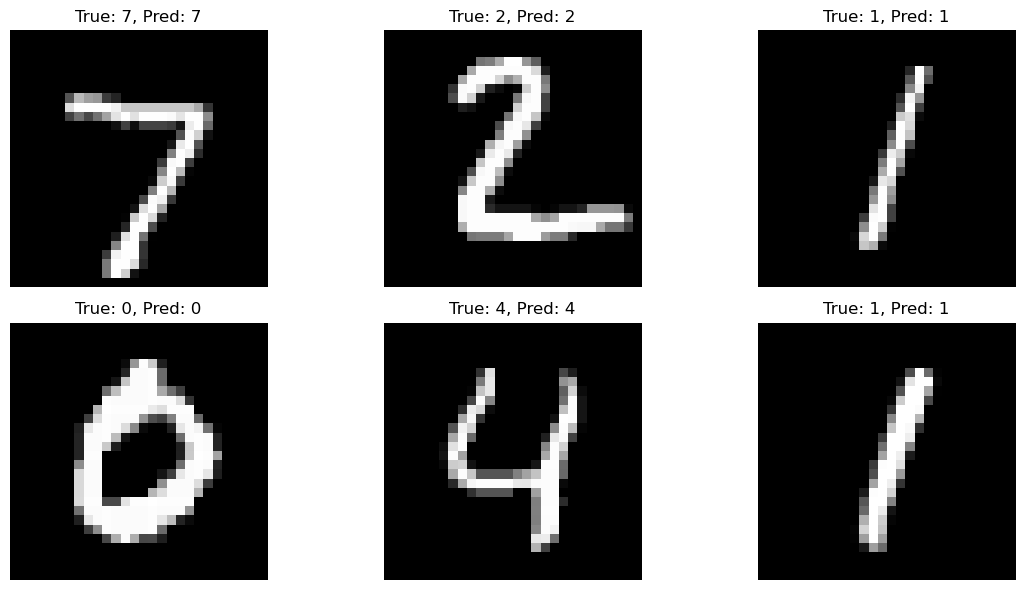

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Function to visualize predictions
def visualize_predictions(model, test_loader, device):
    model.eval()
    model.to(device)

    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(images)
        _, predictions = torch.max(outputs.data, 1)

    # Move to CPU for visualization
    images = images.cpu().numpy()
    predictions = predictions.cpu().numpy()
    labels = labels.cpu().numpy()

    # Plot
    num_samples = 6
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"True: {labels[i]}, Pred: {predictions[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
visualize_predictions(model, test_loader, device)